In [1]:
# import MNISTtools
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.autograd as ag
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import config

# Load the skeleton of the VGG16 architecture

In [2]:
# load the architecture's skeleton
vgg16 = torchvision.models.vgg16_bn(pretrained=False)
for parameter in vgg16.features.parameters():
    parameter.require_grad = False

in_ftrs = vgg16.classifier[6].in_features
features = list(vgg16.classifier.children())[:-1]       # Removing last layer to add out 10 units layer
features.extend([nn.Linear(in_ftrs, 10)])                # adding out layer with 10 units
vgg16.classifier = nn.Sequential(*features)

# Loading our trained model

In [3]:
# # load the saved model
vgg16.load_state_dict(torch.load(config.vgg_model_path))
vgg16 = vgg16.cuda()

In [4]:
test_transform = transforms.Compose([
                        transforms.Resize(224), 
                        transforms.ToTensor(),
                        transforms.Lambda(lambda x: torch.cat([x,x,x],0)) ])

testset = torchvision.datasets.FashionMNIST(root=config.data_path, train=False,
                                        download=True, transform=test_transform)        # download=True for the 1st time

#testloader = torch.utils.data.DataLoader(testset, batch_size=40, shuffle=False, num_workers=2)

testimage =  torch.utils.data.DataLoader(testset, shuffle=False)

Processing...
Done!


Method for testing one image

In [5]:
def testone(vgg16, testingimage):
    
    acc_test = 0.0
    
    vgg16.train(False)
    vgg16.eval()    
    
    image, label = testingimage

    image = image.cuda()
    label = label.cuda()
    image = ag.Variable(image, volatile=True)
    label = ag.Variable(label, volatile=True)

    output = vgg16(image)
   
    _, predicted = torch.max(output.data, 1)
    acc_test = (predicted == label.data)
    print('Predicted: ', label_dict[predicted.cpu().numpy()[0]])
    
    del output, predicted, image, label
    torch.cuda.empty_cache()
    #     gc.collect()

    print('Accuracy: %d' %(acc_test))
    

('Ground Truth: ', 'Ankle boot')
('Predicted: ', 'Ankle boot')
Accuracy: 1


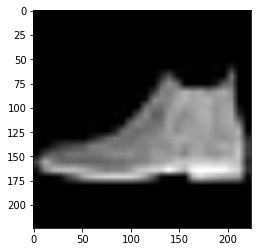




('Ground Truth: ', 'Pullover')
('Predicted: ', 'Pullover')
Accuracy: 1


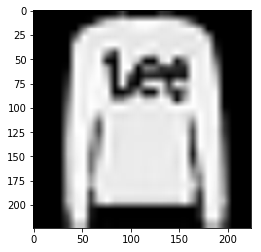




('Ground Truth: ', 'Trouser')
('Predicted: ', 'Trouser')
Accuracy: 1


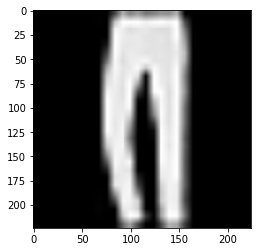




('Ground Truth: ', 'Trouser')
('Predicted: ', 'Trouser')
Accuracy: 1


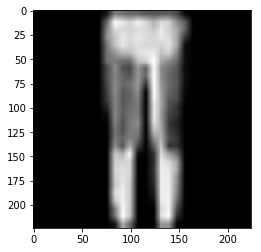




('Ground Truth: ', 'Shirt')
('Predicted: ', 'Shirt')
Accuracy: 1


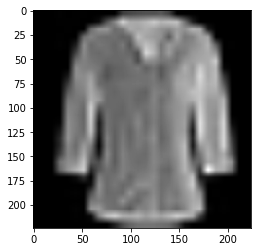




('Ground Truth: ', 'Trouser')
('Predicted: ', 'Trouser')
Accuracy: 1


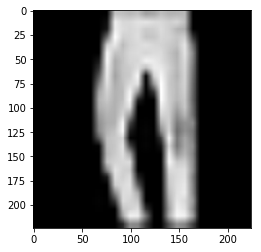




('Ground Truth: ', 'Coat')
('Predicted: ', 'Coat')
Accuracy: 1


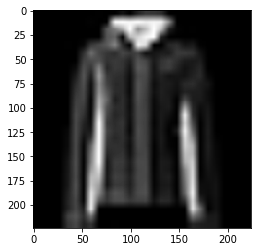




('Ground Truth: ', 'Shirt')
('Predicted: ', 'Shirt')
Accuracy: 1


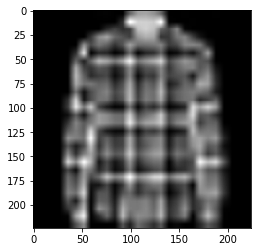




('Ground Truth: ', 'Sandal')
('Predicted: ', 'Sandal')
Accuracy: 1


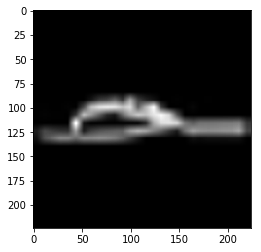




('Ground Truth: ', 'Sneaker')
('Predicted: ', 'Sneaker')
Accuracy: 1


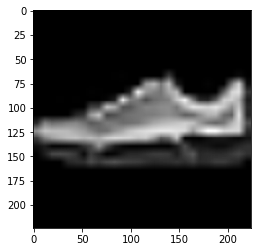

In [8]:
label_dict = {0: 'T-shirt/top',1: 'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',
              5: 'Sandal',6: 'Shirt',7: 'Sneaker',8: 'Bag',9:'Ankle boot' }

no_of_images = 10            # demo for no_of_images

for i, data in enumerate(testimage, 0):

        image, label = data
        print('Ground Truth: ', label_dict[label[0]])
        testone(vgg16, data)
        
        img = image[0,0,:,:]
        lab = label.numpy()[0]
        
        
        plt.figure()
        plt.imshow((img.numpy()), cmap = 'gray')
        plt.show()
        print('\n\n===============================\n')
            
        if i==no_of_images-1:          
            break